## Examining the effect of IASKA parameters on a 1-D function

In [1]:
import numpy as np
from numpy import sin
from numpy import arange
import matplotlib.pyplot as plt

### The chosen objective function is $U(x) = sin(x) + sin(\frac{10x}{3})$

#### Function taken from : https://machinelearningmastery.com/1d-test-functions-for-function-optimization/

In [2]:
def objective(x):
    return sin(x) + sin((10.0/3.0)*x)

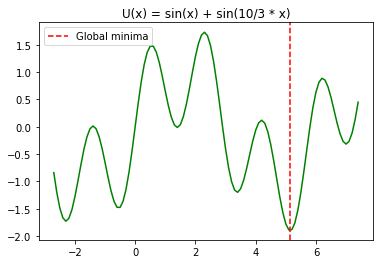

In [3]:
# INPUT RANGE
r_min, r_max = -2.7, 7.5
# Sample datapoints in the input range
inputs = arange(r_min, r_max, 0.1)
# compute targets
results = objective(inputs)

# PLOT - loss function + global minimum
plt.plot(inputs, results, color = 'green')
x_optima = 5.145735
plt.axvline(x=x_optima, ls='--', color='red', label = "Global minima")
plt.legend()
plt.title("U(x) = sin(x) + sin(10/3 * x)")
plt.savefig("IKSA1.png")
plt.show()

### We define the fransformation $H(x) = \int_{U_{min}}^{U(x)} \frac{1}{f((u - c)_+) + \epsilon} du$

### We consider $f(x) = x$:

In [4]:
#U(x) <= c:
def H_less(U, u_min, c, eps, x):
    return (1/eps)*(U(x) - u_min)
# else:
def H_more(U, u_min, c, eps, x):
    return (1/eps)*(c-u_min) + np.log(((U(x) - c) + eps)/eps)

### Let us examine how the choice of c and $\epsilon$ affects the transformation:

#### Let us establish the maximum and minimum of $U(x)$:

In [5]:
U = objective
u_min = min(results)
u_max = max(results)

print(f"Minimum of c is {u_min}")
print(f"Maximum of c is {u_max}")

Minimum of c is -1.8872121742072934
Maximum of c is 1.7282129991630932


### I. We vary c as we keep $\epsilon$ fixed at 1

c is:  -5


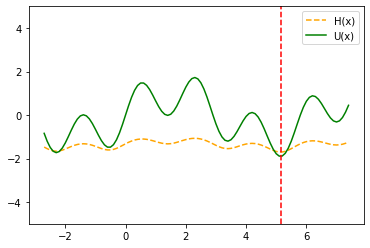

c is:  -2


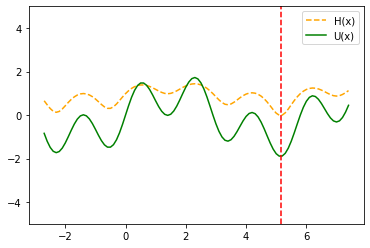

c is:  -1.8872121742072934


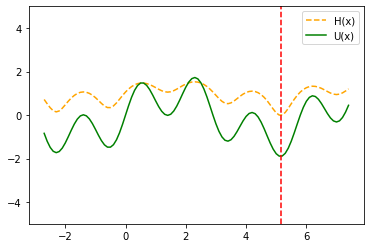

c is:  -1.5


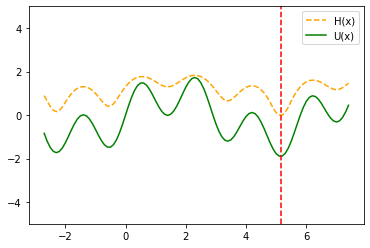

c is:  -1


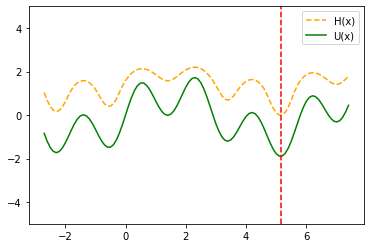

c is:  -0.5


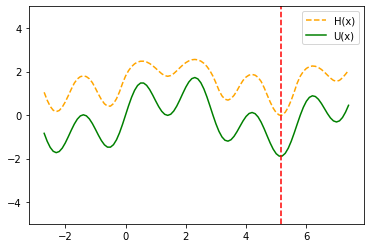

c is:  0


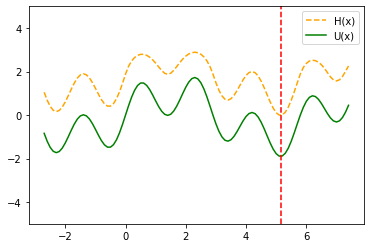

c is:  0.5


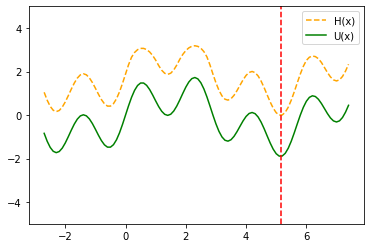

c is:  1


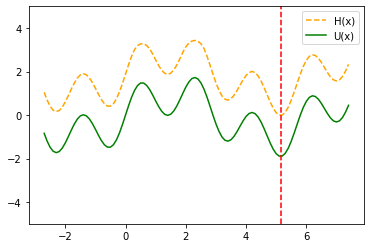

c is:  1.5


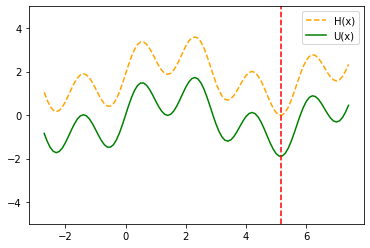

c is:  2


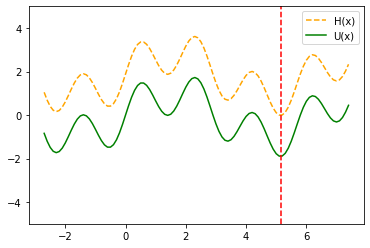

c is:  5


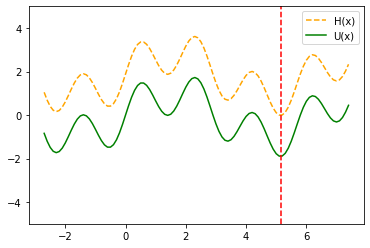

In [27]:
eps = 1
c_list = [-5, -2, u_min, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 5]
for c in c_list:
    print("c is: ", c)
    results_H = []
    for elem in inputs:
        if U(elem) <= c:
            res = H_less(U, u_min, c, eps, elem)
            results_H.append(res)
        else:
            res = H_more(U, u_min, c, eps, elem)
            results_H.append(res)

    # create a line plot of input vs result
    plt.plot(inputs, results_H, ls = '--', color = 'orange', label = "H(x)")
    plt.plot(inputs,results, color = 'green', label = "U(x)")
    plt.axvline(x=x_optima, ls='--', color='red')
    plt.ylim((-5, 5))
    plt.legend()
    #plt.savefig("IKSA.png")
    plt.show()


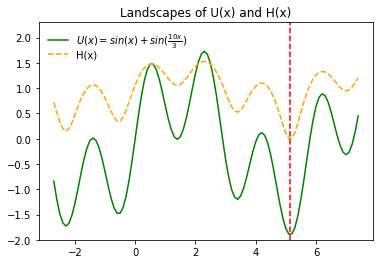

In [28]:
eps = 1
c = u_min


results_H = []
for elem in inputs:
    if U(elem) <= c:
        res = H_less(U, u_min, c, eps, elem)
        results_H.append(res)
    else:
        res = H_more(U, u_min, c, eps, elem)
        results_H.append(res)

# create a line plot of input vs result
plt.plot(inputs,results, color = 'green', label = "$U(x) = sin(x) + sin(\\frac{10x}{3})$")
plt.plot(inputs, results_H, ls = '--', color = 'orange', label = "H(x)")
plt.axvline(x=x_optima, ls='--', color='red')
plt.ylim((-2, 2.3))
plt.title("Landscapes of U(x) and H(x)")
#plt.title("epsilon = 1, c = u_min")
plt.legend(loc = 2, frameon=False, labelspacing = 0)
plt.savefig("IKSA_f(x)=x.png")
plt.show()


#### Let us create a relevant plot to be exported:

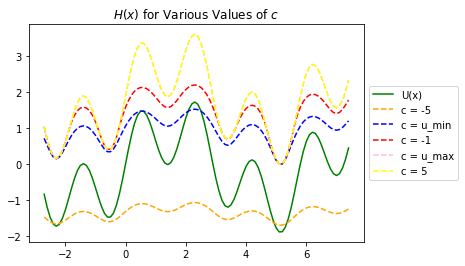

In [54]:
eps = 1
c_list = [-5, u_min, -1, u_max, 5]
results_list = []
for c in c_list:
    #print("c is: ", c)
    results_H = []
    for elem in inputs:
        if U(elem) <= c:
            res = H_less(U, u_min, c, eps, elem)
            results_H.append(res)
        else:
            res = H_more(U, u_min, c, eps, elem)
            results_H.append(res)
    results_list.append(results_H)
    
plt.plot(inputs,results, color = 'green', label = "U(x)")
plt.plot(inputs, results_list[0], ls = '--', color = 'orange', label = "c = -5")
plt.plot(inputs, results_list[1], ls = '--', color = 'blue', label = "c = u_min")
plt.plot(inputs, results_list[2], ls = '--', color = 'red', label = "c = -1")
plt.plot(inputs, results_list[3], ls = '--', color = 'pink', label = "c = u_max")
plt.plot(inputs, results_list[4], ls = '--', color = 'yellow', label = "c = 5")

#plt.axvline(x=x_optima, ls='--', color='red')
#plt.ylim((-5, 5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("$H(x)$ for Various Values of $c$")
#plt.title("epsilon = 1, f(x) = x")
plt.savefig("IKSA_c.png", bbox_inches='tight')
plt.show()

### II. We vary $\epsilon$ as we keep c = u_min

eps is:  0.5


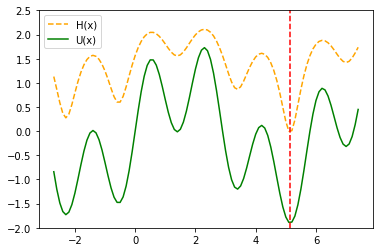

eps is:  1


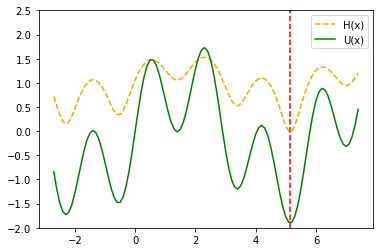

eps is:  1.5


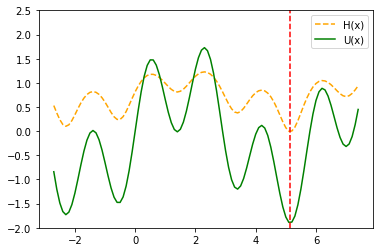

eps is:  2


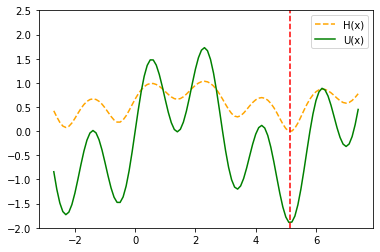

eps is:  5


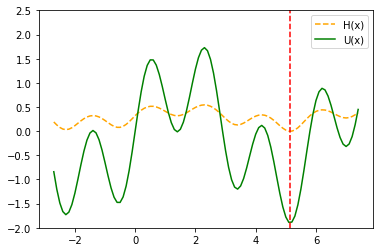

In [30]:
c = u_min
eps_list = [0.5, 1, 1.5, 2, 5]
for eps in eps_list:
    print("eps is: ", eps)
    results_H = []
    for elem in inputs:
        if U(elem) <= c:
            res = H_less(U, u_min, c, eps, elem)
            results_H.append(res)
        else:
            res = H_more(U, u_min, c, eps, elem)
            results_H.append(res)

    # create a line plot of input vs result
    plt.plot(inputs, results_H, ls = '--', color = 'orange', label = "H(x)")
    plt.plot(inputs,results, color = 'green', label = "U(x)")
    plt.axvline(x=x_optima, ls='--', color='red')
    plt.ylim((-2, 2.5))
    plt.legend()
    #plt.savefig("IKSA.png")
    plt.show()

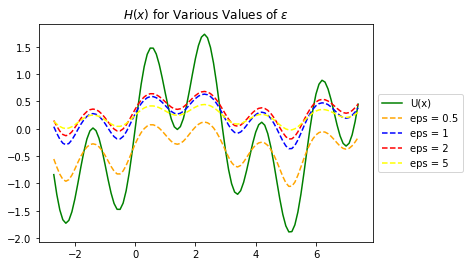

In [59]:
c = -3
eps_list = [0.5, 1, 1.5, 5]
results_list = []
for eps in eps_list:
    #print("eps is: ", eps)
    results_H = []
    for elem in inputs:
        if U(elem) <= c:
            res = H_less(U, u_min, c, eps, elem)
            results_H.append(res)
        else:
            res = H_more(U, u_min, c, eps, elem)
            results_H.append(res)
            
    results_list.append(results_H)

# create a line plot of input vs result
plt.plot(inputs,results, color = 'green', label = "U(x)")
plt.plot(inputs, results_list[0], ls = '--', color = 'orange', label = "eps = 0.5")
plt.plot(inputs, results_list[1], ls = '--', color = 'blue', label = "eps = 1")
plt.plot(inputs, results_list[2], ls = '--', color = 'red', label = "eps = 2")
plt.plot(inputs, results_list[3], ls = '--', color = 'yellow', label = "eps = 5")

#plt.axvline(x=x_optima, ls='--', color='red')
#plt.ylim((-2, 2.5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("$H(x)$ for Various Values of $\\epsilon$ ")
#plt.title("c = u_min, f(x) = x")
plt.savefig("IKSA_eps.png", bbox_inches='tight')
#plt.savefig("IKSA.png")
plt.show()

## Now, let us consider $f(x) = x^2$:

In [35]:
import math
#U(x) <= c:
def H_less(U, u_min, c, eps, x):
    return (1/eps)*(U(x) - u_min)
# else:
def H1_more(U, u_min, c, eps, x):
    return (1/eps)*(c-u_min) + 1/math.sqrt(eps) * np.arctan((U(x) - c)/math.sqrt(eps))

c is:  -5


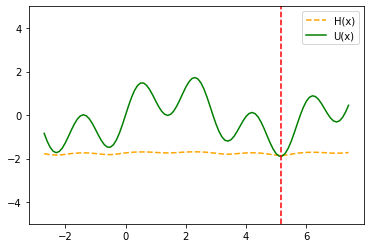

c is:  -2


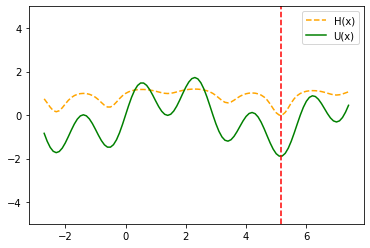

c is:  -1.8872121742072934


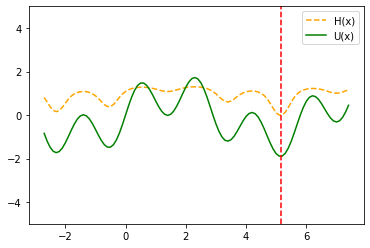

c is:  -1.5


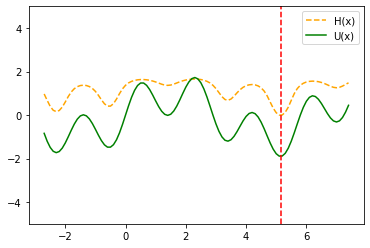

c is:  -1


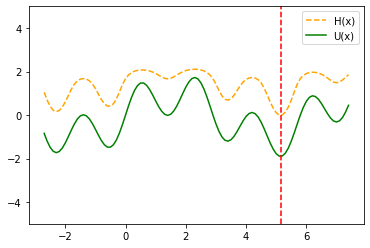

c is:  -0.5


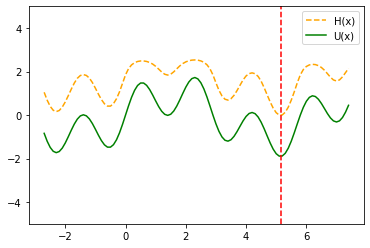

c is:  0


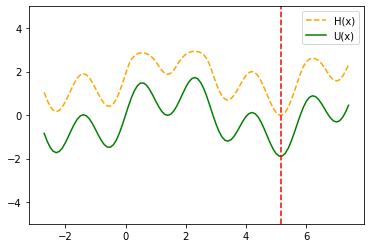

c is:  0.5


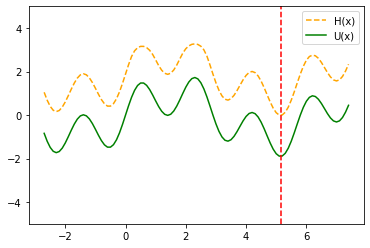

c is:  1


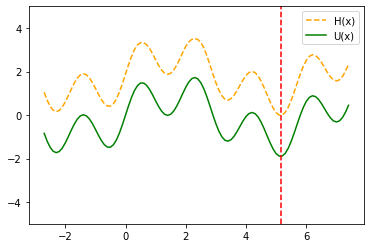

c is:  1.5


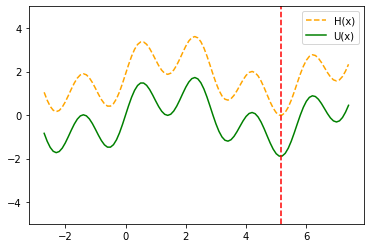

c is:  2


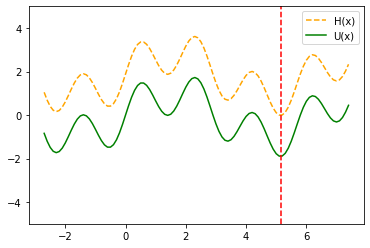

c is:  5


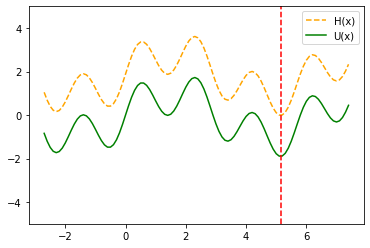

In [13]:
eps = 1
c_list = [-5, -2, u_min, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 5]
for c in c_list:
    print("c is: ", c)
    results_H = []
    for elem in inputs:
        if U(elem) <= c:
            res = H_less(U, u_min, c, eps, elem)
            results_H.append(res)
        else:
            res = H1_more(U, u_min, c, eps, elem)
            results_H.append(res)

    # create a line plot of input vs result
    plt.plot(inputs, results_H, ls = '--', color = 'orange', label = "H(x)")
    plt.plot(inputs,results, color = 'green', label = "U(x)")
    plt.axvline(x=x_optima, ls='--', color='red')
    plt.ylim((-5, 5))
    plt.legend()
    #plt.savefig("IKSA.png")
    plt.show()

### Let us create a relevant plot to export:

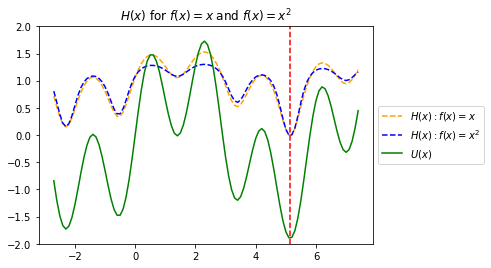

In [52]:
eps = 1
c = u_min

results_H = []
results_H1 = []
for elem in inputs:
    if U(elem) <= c:
        res = H_less(U, u_min, c, eps, elem)
        results_H.append(res)
        results_H1.append(res)
    else:
        res = H_more(U, u_min, c, eps, elem)
        results_H.append(res)
        res1 = H1_more(U, u_min, c, eps, elem)
        results_H1.append(res1)

# create a line plot of input vs result
plt.plot(inputs, results_H, ls = '--', color = 'orange', label = "$H(x): f(x) = x$")
plt.plot(inputs, results_H1, ls = '--', color = 'blue', label = "$H(x): f(x) = x^2$")
plt.plot(inputs,results, color = 'green', label = "$U(x)$")
plt.axvline(x=x_optima, ls='--', color='red')
plt.ylim((-2, 2))
plt.title("$H(x)$ for $f(x) = x$ and $f(x) = x^2$")
#plt.title("epsilon = 1, c = u_min")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("IKSA_f(x)=x^2.png", bbox_inches='tight')
plt.show()